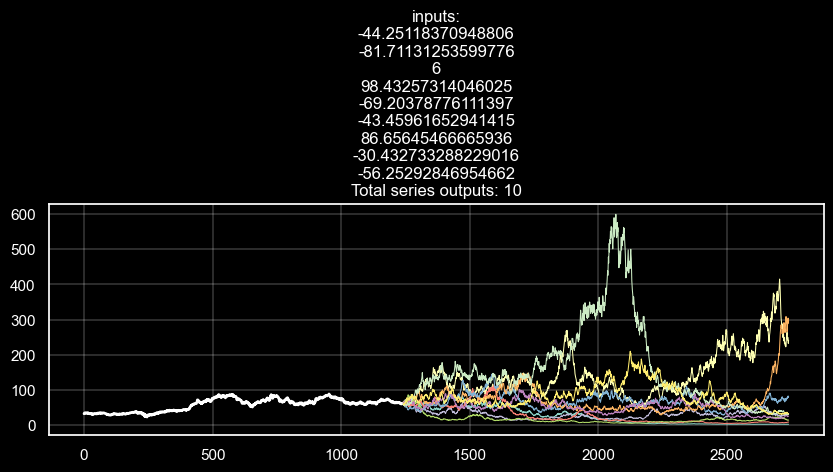

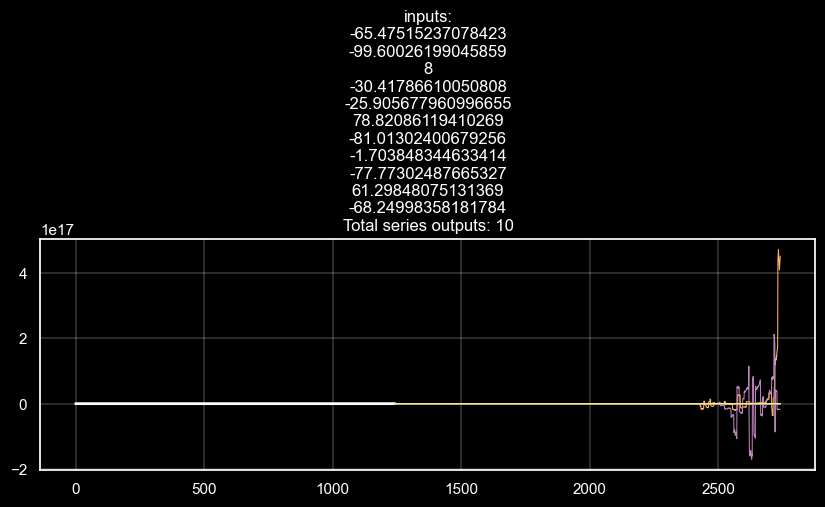

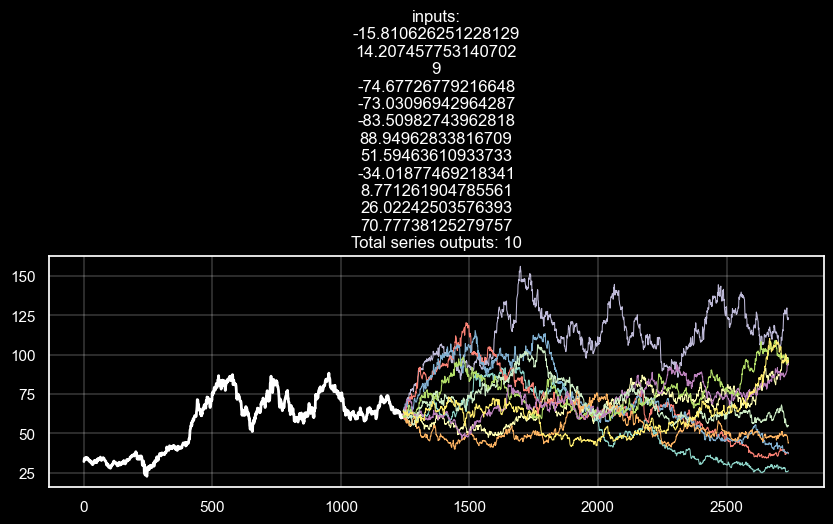

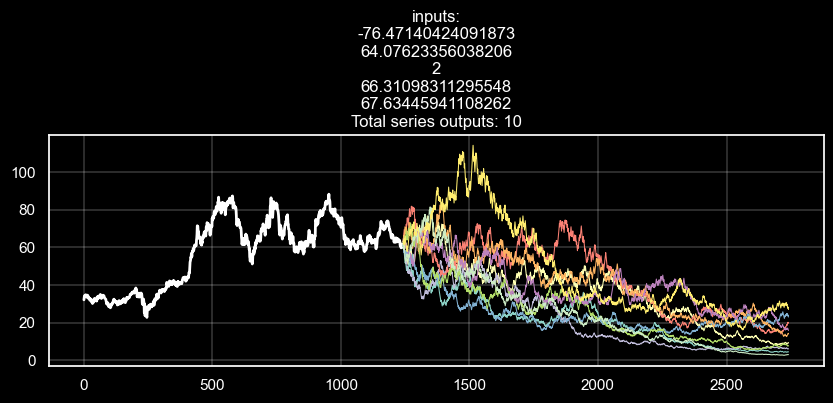

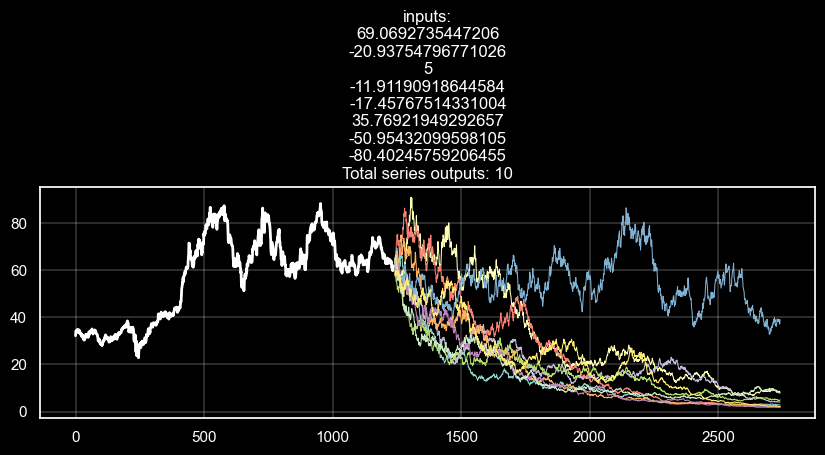

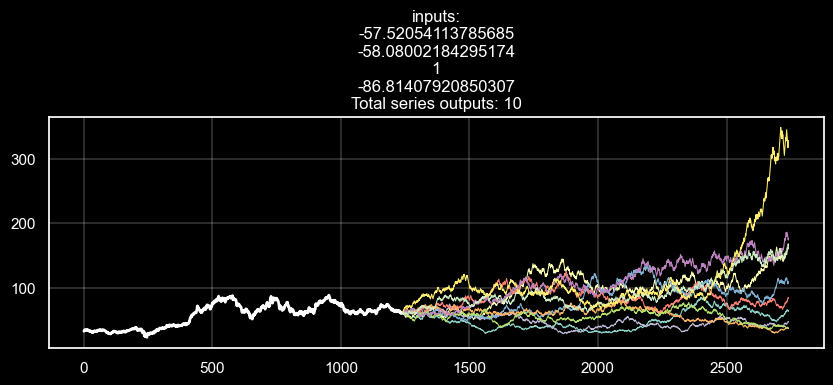

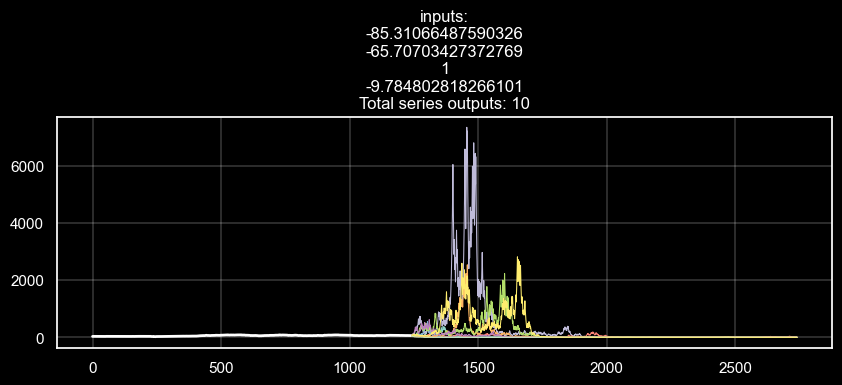

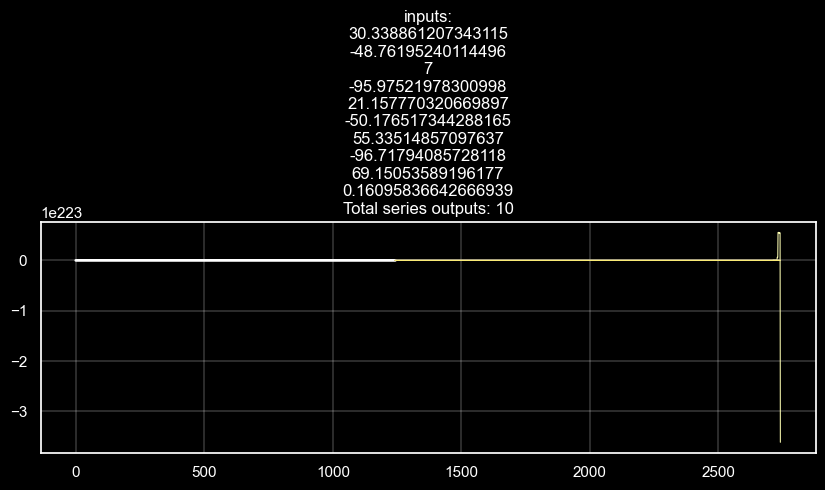

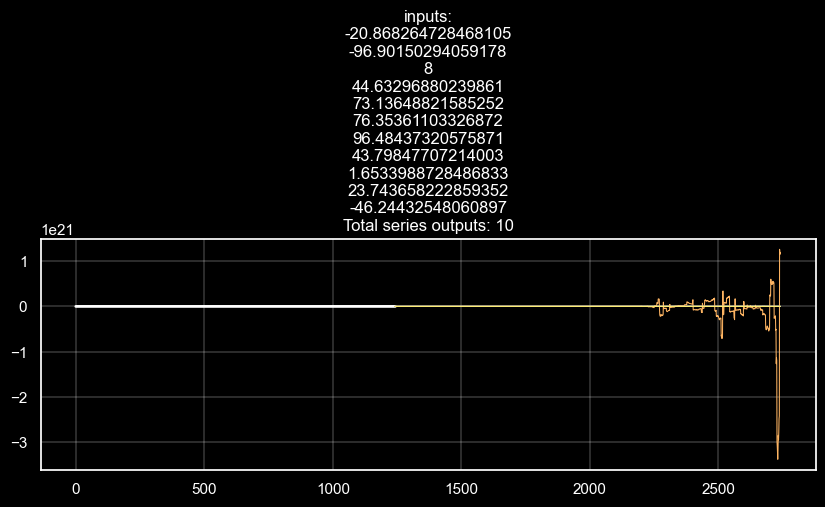

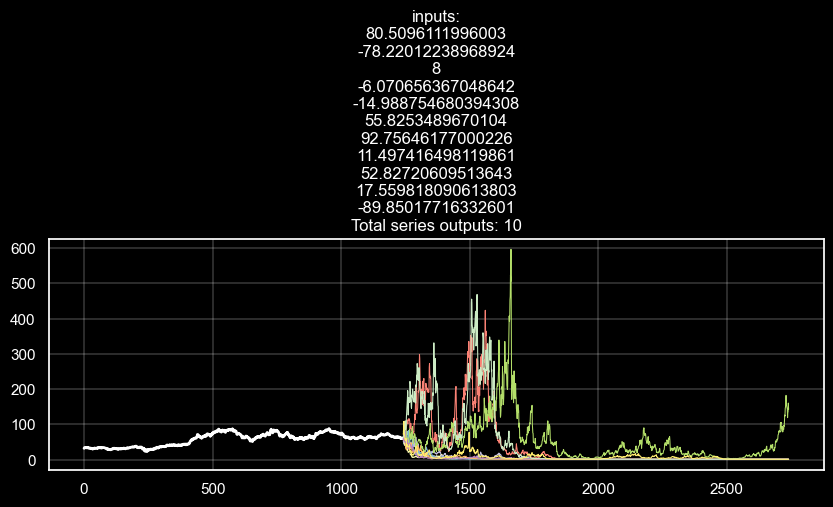

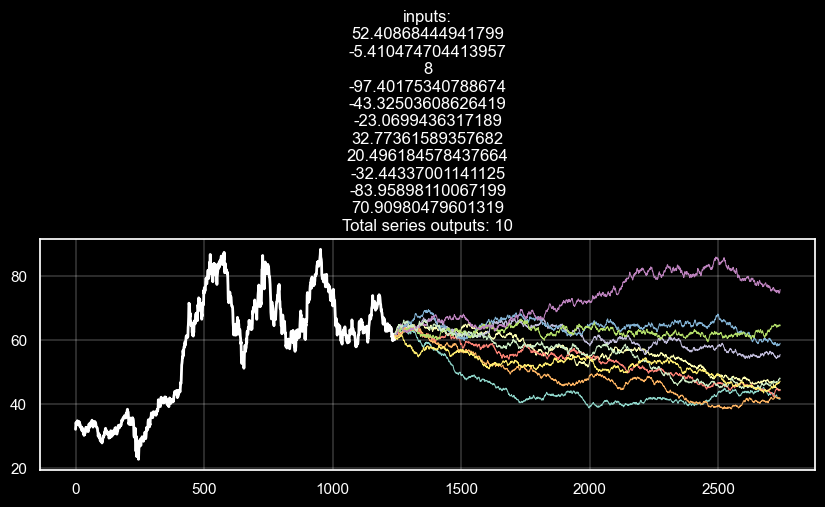

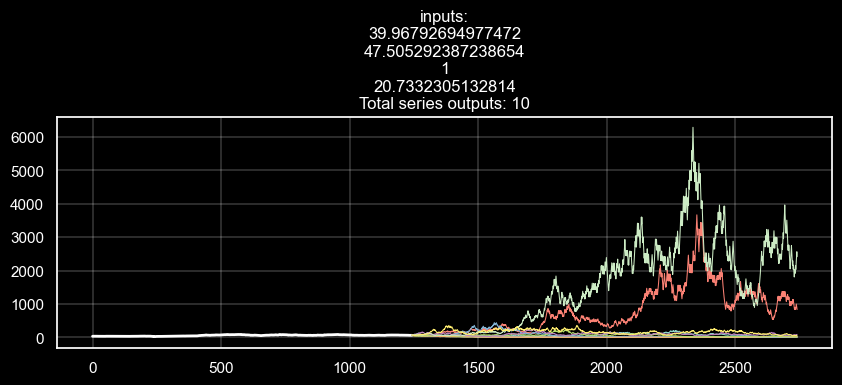

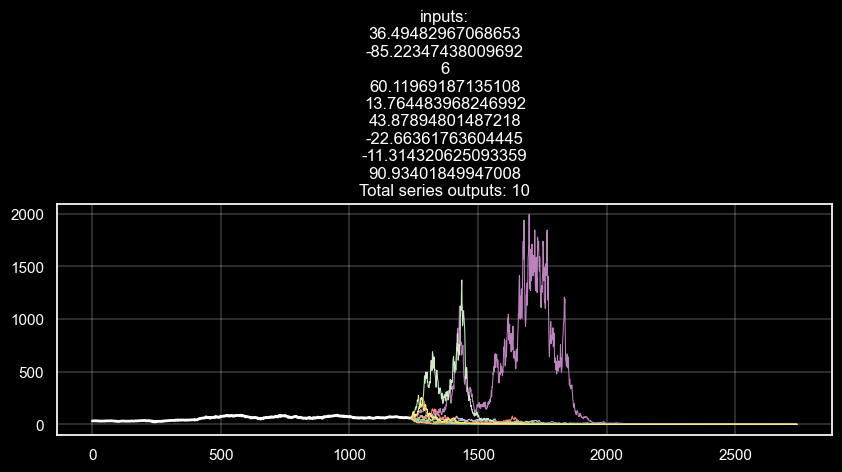

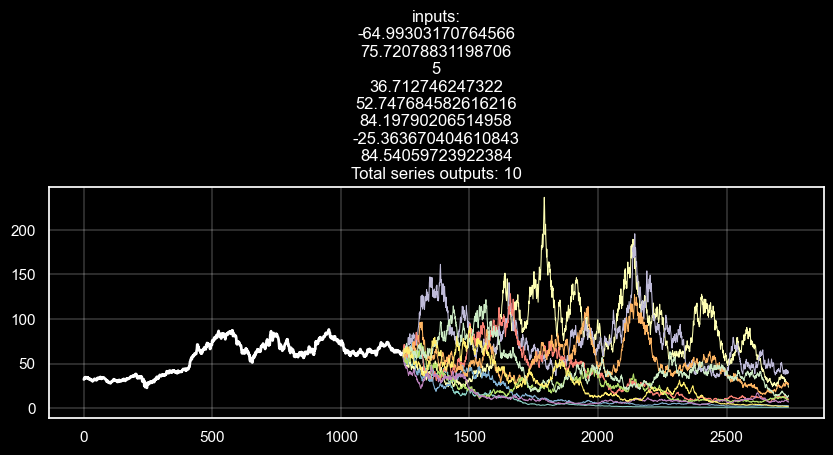

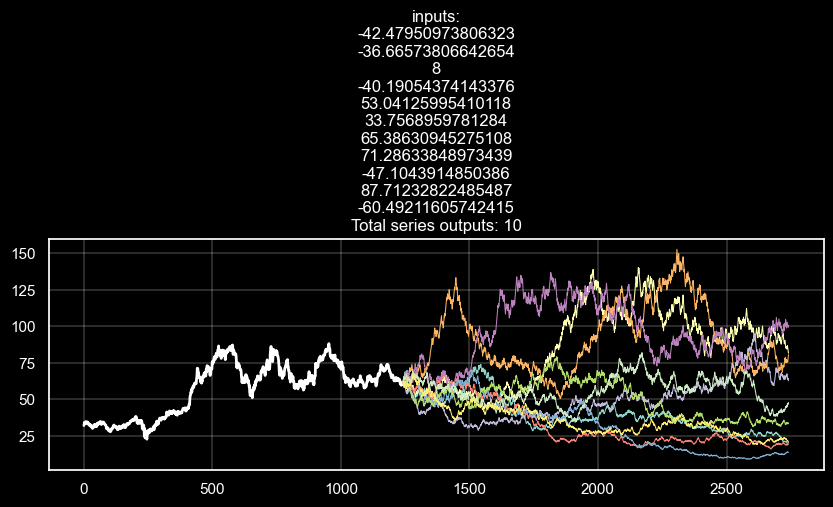

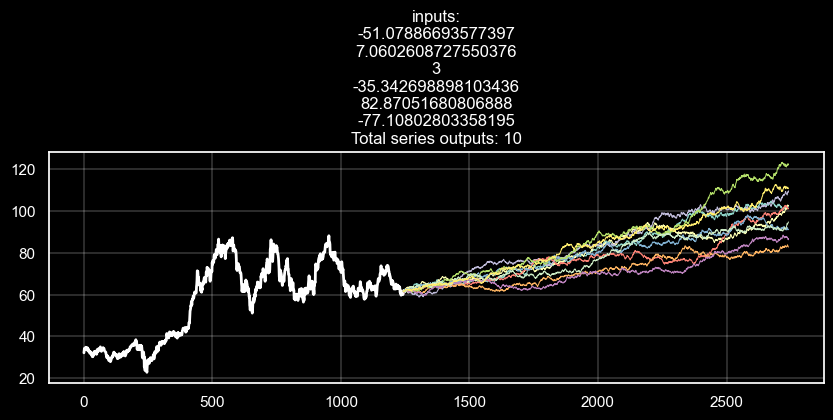

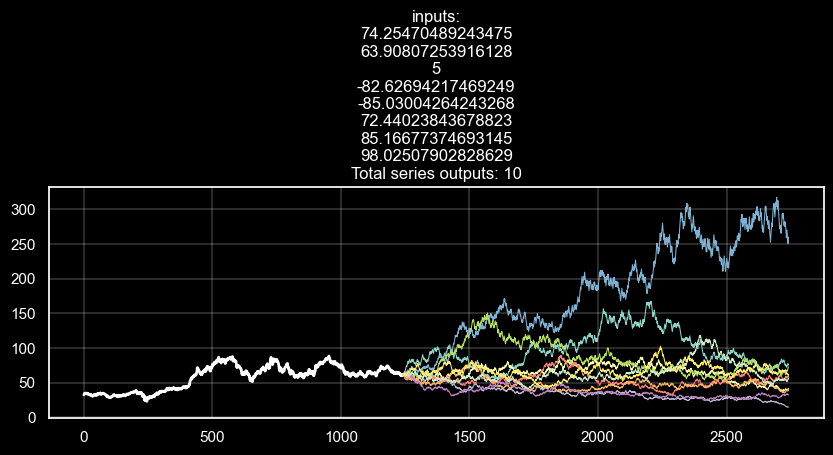

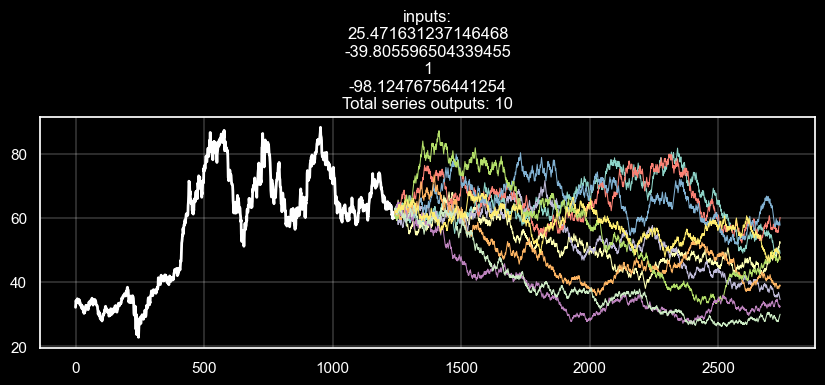

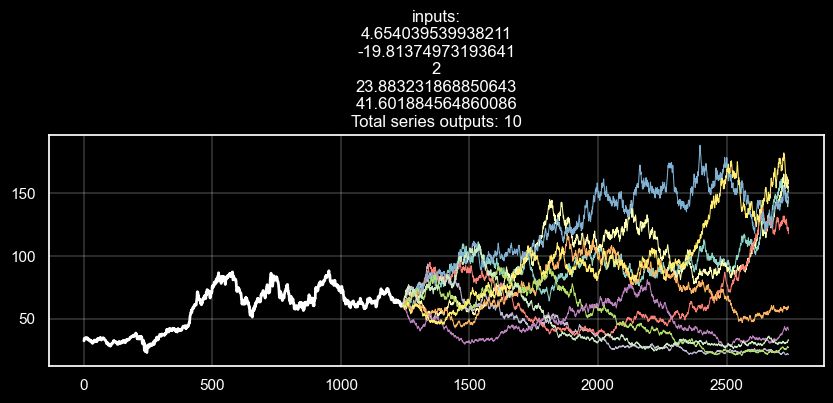

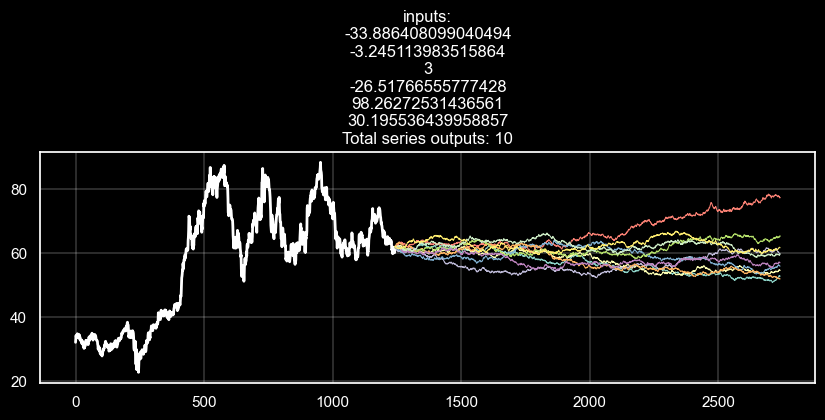

In [62]:
from utils.utils import add_path
from os import listdir
from utils.utils import complex_reading
from pandas import DataFrame
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from yfinance import download

ticker = 'vale3.sa'
folder_ticker = ticker.upper().split('.')[0]
folder_number_of_days = '1500'
price_stock = download(ticker, period='5y', progress=False)[['Adj Close']].reset_index(drop=True)

archives_numbers_inputs = listdir(add_path(['data', folder_ticker, folder_number_of_days, 'inputs_numbers']))
archives_outputs_series = listdir(add_path(['data', folder_ticker, folder_number_of_days, 'outputs_series']))

for inputs_numbers in archives_numbers_inputs:
    archive_inputs_numbers = complex_reading(add_path(['data', folder_ticker, folder_number_of_days, 'inputs_numbers', inputs_numbers]), 'read')
    id_inputs_numbers = inputs_numbers.split('.')[0]

    lists_series = []
    for outputs_series in archives_outputs_series:
        id_outputs_series = outputs_series.split('_')[0]
        
        if id_inputs_numbers == id_outputs_series:
            archive_series = complex_reading(add_path(['data', folder_ticker, folder_number_of_days, 'outputs_series', outputs_series]), 'read')
            list_serie = list(map(float, archive_series[1:-1].split(', ')))
            lists_series.append(list_serie)
    
    df_data_series = DataFrame(lists_series).T
    df_data_series.index = list(range(-2+len(price_stock), -2+len(price_stock)+len(df_data_series)))
    plt.figure(figsize=(10, 3))
    plt.title('inputs:\n' + archive_inputs_numbers.replace('[', '').replace(']', '').replace(', ','\n') + f'\nTotal series outputs: {len(lists_series)}')
    plt.plot(price_stock, linewidth=2, color='w')
    plt.plot(df_data_series, linewidth=0.75)
    plt.grid(linewidth=0.25)
    plt.show()
